# Исследование закономерностей определеяющие успешность игр

**Цель исследования**

- Найти закономерности определяющие успешность игровых платформ, чтобы получить данные, по результатам которых можно будет планировать эффективную реализацию платформ и игр.

**Ход исследования**

Данные о играх я получу из файла **`/datasets/games.csv`**. Перед исследованием, я , изначально, ознакомлюсь, проведу обработку и подготовлю данные для исследовательского анализа. Если потребуется, создам нужные столбцы, проведу исследовательский анализ. Составлю портрет пользователя для каждого региона. Проверю гипотезы. 

Таким образом, мое исследование пройдет в несколько этапов:

- Предобработка данных
- Исследовательский анализ данных
- Проверка гипотез
- Написание общего вывода

In [187]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [188]:
try:
    data = pd.read_csv('/Users/alig/Desktop/portfolio/yandex_curses/5_СП_1_успешность_игр')
    
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [189]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Выведу описание данных дата фрейма**

- **Name** — название игры

- **Platform** — платформа

- **Year_of_Release** — год выпуска

- **Genre** — жанр игры

- **NA_sales** — продажи в Северной Америке (миллионы проданных копий)

- **EU_sales** — продажи в Европе (миллионы проданных копий)

- **JP_sales** — продажи в Японии (миллионы проданных копий)

- **Other_sales** — продажи в других странах (миллионы проданных копий)

- **Critic_Score** — оценка критиков (максимум 100)

- **User_Score** — оценка пользователей (максимум 10)

- **Rating**— рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Предобработка данных

**Для начала, приведу все названия столбцов к общему формату с помощью нижнего регистра**

Т.к. колонок не много, я не буду выводить все уникальные значения с наименованиями.

In [190]:
data.columns = data.columns.str.lower()

Проверю изменения

In [191]:
data.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E


Выведу на экран общюю информацию о данных

In [192]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Посмотрю на количество пропусков в данных**

In [193]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,40.000000


**Колонка 'year_of_release'**

В колонке **year_of_release** - 2% пропусков. Если пустых значений меньше 5% от общего дата фрмейма, то этими данными можно пожертвовать. Считаю, что заполнение пропусков медианным значением или "заглушкой" нецелесообразно.

In [194]:
data['year_of_release'].isna().sum()

269

In [195]:
data = data.dropna(subset=['year_of_release'])

In [196]:
data['year_of_release'].isna().sum()

0

**Изменю тип данных столбца 'year_of_release' на "int64"**

Все же год должен обозначаться целыми числами

In [197]:
data['year_of_release'] = data['year_of_release'].astype('int64')

In [198]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [199]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Колонка **'critic_score'**

В колонке **'critic_score'**, больше 51% пропусков. Разумеется, такой массив данных удалить нельзя, т.к. это будет серьезная ошибка, влияющая на результаты исследования. Т.к. даные в столбце имеют численный показатель, я заменю все **'NaN'** на **"заглушку"** в виде числа "-1".

In [200]:
data['critic_score'].isna().sum()

8463

In [201]:
data['critic_score'] = data['critic_score'].fillna('-1').astype('float64')

In [202]:
data['critic_score'].isna().sum()

0

In [203]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,NaN,NaN


Колонка **'user_score'**

Аналогичную операцию проведу с столбцом **'user_score'**. Т.к. пустых значений 40%. Что также является очень большим количеством, которым нельзя жертвовать.

In [204]:
data['user_score'].isna().sum()

6607

In [205]:
#data['user_score'] = data['user_score'].fillna('-1').astype('float64')

В ходе обработки получил ошибку.

Проверю уникальные значения в столбце.

In [206]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Аббревиатура **'tbd'**. Прогуглил ее и узнал, что эти данные еще не определены.
Посмотрю их количество.

In [207]:
data.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,-1.0,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,-1.0,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,-1.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,-1.0,tbd,E


Получаем около 14%.

Изменю значения **'tbd'** на **'NaN'**, а потом на числовую заглушку ("-1")

In [208]:
data.loc[data['user_score']=="tbd", 'user_score']=np.nan

In [209]:
data['user_score'] = data['user_score'].fillna('-1').astype('float64')

In [210]:
data['user_score'].unique()

array([ 8. , -1. ,  8.3,  8.5,  6.6,  8.4,  8.6,  7.7,  6.3,  7.4,  8.2,
        9. ,  7.9,  8.1,  8.7,  7.1,  3.4,  5.3,  4.8,  3.2,  8.9,  6.4,
        7.8,  7.5,  2.6,  7.2,  9.2,  7. ,  7.3,  4.3,  7.6,  5.7,  5. ,
        9.1,  6.5,  8.8,  6.9,  9.4,  6.8,  6.1,  6.7,  5.4,  4. ,  4.9,
        4.5,  9.3,  6.2,  4.2,  6. ,  3.7,  4.1,  5.8,  5.6,  5.5,  4.4,
        4.6,  5.9,  3.9,  3.1,  2.9,  5.2,  3.3,  4.7,  5.1,  3.5,  2.5,
        1.9,  3. ,  2.7,  2.2,  2. ,  9.5,  2.1,  3.6,  2.8,  1.8,  3.8,
        0. ,  1.6,  9.6,  2.4,  1.7,  1.1,  0.3,  1.5,  0.7,  1.2,  2.3,
        0.5,  1.3,  0.2,  0.6,  1.4,  0.9,  1. ,  9.7])

In [211]:
data['user_score'].isna().sum()

0

Колонка **'rating'**

В колонке 'rating' 40% пропусков. Т.к. даные в столбце имеют строковый формат, я заменю все пропуски на "заглушку" в виде **"unknown"**.


In [212]:
data['rating'].isna().sum()

6678

In [213]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [214]:
data['rating'] = data['rating'].fillna('unknown')

In [215]:
data['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [216]:
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown


In [217]:
data['rating'].isna().sum()

0

**Проверю пропуски в дата фрейме**

In [218]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,0.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,0.000000
user_score,0.000000


**Проверю данные на явные дубликаты**

In [219]:
data.duplicated().sum()

0

**Добавлю в таблицу новый столбец и посчитаю суммарные продажи во всех регионах**

In [220]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [221]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown,31.38


Посмотреть дубликаты в названиях игр. Найти закономерность повторений!!!!
 Проверить аномальные значения в рейтингах и годах

### Проверка на неявные дубликаты

Из всех стобцов, я хочу проверить на дубликаты колонку с названиями игр **'name'**, если дубликаты будут присутствовать, то узнаю закономерность их появлений. Остальные столбцы не вижу смысла проверять, т.к. год выпуска, жанр, продажи, оценки критиков и пользователей, могут и будут содержать идентичную информацию.

In [222]:
data['name'].duplicated().sum()

5019

Выведу сводную таблицу с именем игры и годом выпуска.

In [223]:
data\
.pivot_table(index=['name', 'year_of_release'], aggfunc='count')\
.sort_values(by='platform', ascending=False)

,,critic_score,eu_sales,genre,jp_sales,na_sales,other_sales,platform,rating,total_sales,user_score
name,year_of_release,,,,,,,,,,
Ratatouille,2007,9,9,9,9,9,9,9,9,9,9
LEGO Marvel Super Heroes,2013,9,9,9,9,9,9,9,9,9,9
FIFA 14,2013,9,9,9,9,9,9,9,9,9,9
FIFA Soccer 13,2012,8,8,8,8,8,8,8,8,8,8
The LEGO Movie Videogame,2014,8,8,8,8,8,8,8,8,8,8
...,...,...,...,...,...,...,...,...,...,...,...
HotBrain,2007,1,1,1,1,1,1,1,1,1,1
Hotel Dusk: Room 215,2007,1,1,1,1,1,1,1,1,1,1
Hotel Giant 2,2008,1,1,1,1,1,1,1,1,1,1


**Некоторые игры повторяются до 9 раз. Рассмотрю более подробно пару игр.**

In [224]:
data.loc[data['name'] == 'Ratatouille']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1598,Ratatouille,DS,2007,Action,0.49,0.62,0.0,0.14,-1.0,-1.0,unknown,1.25
2442,Ratatouille,PS2,2007,Action,0.31,0.00,0.0,0.53,65.0,8.0,E,0.84
3069,Ratatouille,PSP,2007,Action,0.22,0.27,0.0,0.16,64.0,7.1,E,0.65
3902,Ratatouille,PS3,2007,Action,0.09,0.32,0.0,0.10,55.0,4.8,E,0.51
3948,Ratatouille,Wii,2007,Action,0.43,0.03,0.0,0.04,62.0,6.7,E,0.50
6398,Ratatouille,X360,2007,Action,0.23,0.02,0.0,0.02,56.0,-1.0,E,0.27
7681,Ratatouille,GBA,2007,Action,0.14,0.05,0.0,0.00,65.0,-1.0,E,0.19
9015,Ratatouille,GC,2007,Action,0.11,0.03,0.0,0.00,60.0,5.6,E,0.14
14514,Ratatouille,PC,2007,Action,0.01,0.01,0.0,0.00,-1.0,7.9,E,0.02


In [225]:
data.loc[data['name'] == 'LEGO Marvel Super Heroes']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
730,LEGO Marvel Super Heroes,X360,2013,Action,1.24,0.79,0.00,0.19,80.0,7.6,E10+,2.22
945,LEGO Marvel Super Heroes,PS3,2013,Action,0.77,0.76,0.01,0.29,82.0,7.9,E10+,1.83
1139,LEGO Marvel Super Heroes,PS4,2013,Action,0.59,0.76,0.01,0.26,83.0,7.7,E10+,1.62
1959,LEGO Marvel Super Heroes,XOne,2013,Action,0.61,0.35,0.00,0.09,-1.0,6.8,E10+,1.05
2313,LEGO Marvel Super Heroes,3DS,2013,Action,0.42,0.36,0.04,0.07,61.0,5.2,E10+,0.89
2778,LEGO Marvel Super Heroes,WiiU,2013,Action,0.31,0.35,0.02,0.06,82.0,8.0,E10+,0.74
3876,LEGO Marvel Super Heroes,PSV,2013,Action,0.11,0.29,0.00,0.11,-1.0,-1.0,unknown,0.51
5054,LEGO Marvel Super Heroes,DS,2013,Action,0.22,0.13,0.00,0.03,-1.0,4.8,E10+,0.38
8369,LEGO Marvel Super Heroes,PC,2013,Action,0.04,0.12,0.00,0.01,78.0,8.1,E10+,0.17


Дубликаты в названиях игр связанны с тем, что игры выпускались на разные платформы, что и подверждают данные выше. Жанр и год выпуска в запрашиваемых играх одинаковый, соответственно эти данные вызывают доверие и никаких манипуляций в колонке **'name'** по удалению дубликатов, я проводить не буду.

### Проверка на аномальные значения.

На аномальные значения я буду проверять несколько столбцов: год выпуска игры(**'year_of_release'**), оценка критиков(**'critic_score'**), оценка пользователей(**'user_score'**).

Если по году выпуска никаких критериев нет, просто должен быть корректный показатель, то по колонке с оценкой критиков и оценкой пользовтелей есть четкие ограничительные рамки в показателях. Показатель оценки критиков не должен превышать **100**. А показатель оценки пользователей не должен превышать **10**.

Столбец **'year_of_release'**

In [226]:
data['year_of_release'].describe()

count    16446.000000
mean      2006.484616
std          5.877050
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

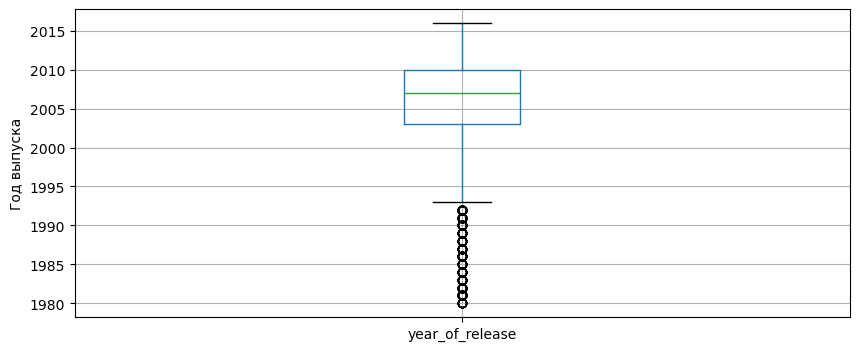

In [227]:
data.boxplot(column=['year_of_release'], figsize=(10,4), grid=True)

plt.ylabel('Год выпуска')
plt.show()

Исходя из описания столбца **'year_of_release'** и "ящика с усами" видно, что аномальных выбросов нет. 

Я прогуглил, в каком году была выпущена одна из самых старейших игр. Это игра "Tic-Tac-Toe", которая вышла в 1952 году. Что дает основание утверждать о корректности данных в исследуемой колонке.

Столбец **'critic_score'**

In [228]:
data['critic_score'].describe()

count    16446.000000
mean        32.975739
std         36.302673
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         70.000000
max         98.000000
Name: critic_score, dtype: float64

По описаню столбца видны минимальные и максимальные значения. Все находится в установленных рамках оценки  **(до 100)**. Выбросов нет. Минусовые значения обусловленны заменой мной пропусков **"числовую заглушку"**. Из-за большого количества пропусков в столбце, медианный показатель выводит значение **(-1)**, т.к. пропуски в данных составляли более **50%**.

Столбец **'user_score'**

In [229]:
data['user_score'].describe()

count    16446.000000
mean         2.687632
std          4.170069
min         -1.000000
25%         -1.000000
50%         -1.000000
75%          7.300000
max          9.700000
Name: user_score, dtype: float64

Аналогичная ситуация и с данным столбцом. Аномальные значения не обнаруженны. Все показатели находятся в установленных рамках оценки **(10)**.

In [230]:
# check 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     16446 non-null  float64
 9   user_score       16446 non-null  float64
 10  rating           16446 non-null  object 
 11  total_sales      16446 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


Удаление пропусков в столбце **genre**

In [231]:
data['genre'].isna().sum()

2

In [232]:
data = data.dropna(subset=['genre'])

In [233]:
data['genre'].isna().sum()

0

### Выводы по разделу

Произведена предобработка данных.

Названия столбцов приведены к общему формату с нижним регистром.

Столбец **year_of_release** приведен к целочисленному формату.

В столбце **critic_score** произвел замену пропущенным значениям на "заглушку" (-1), с сохранением дробного типа данных.

В столбце **user_score** произвел замену пропущенным значениям на "заглушку" (-1), с сохранением дробного типа данных.

В столбце **rating** произвел замену пропущенным значениям на "заглушку" ("unknown"), с сохранением строкового типа данных.

Замена "заглушками" позволит посмотреть, при желании, какую долю занимают пропущенные значения.
Заменять подобные пропуски данных медианными значениями было бы некорректно.

Явные дубликаты не обнаруженны.

Добавлен новый столбец **'total_sales'** с суммой продаж во всех регионах.

Произведена проверка на неявные дубликаты в колонке **'name'**. Выяснилось, что дубликаты связаны с тем, что игры выпускались на разные платформы, что и привело к повторениям в названиях игр.

Выполнена проверка на аномальные значения в столбцах: **'year_of_release'** ,  **'critic_score'**, **'user_score'**. Выбросы не обнаржены.

## Исследование данных

**Количество игр выпускаемых в разные годы**

(Вопрос: Важны ли данные за все периоды?)

In [234]:
data.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

Для лучшей наглядности построю "ящик с усами" и гистограмму.

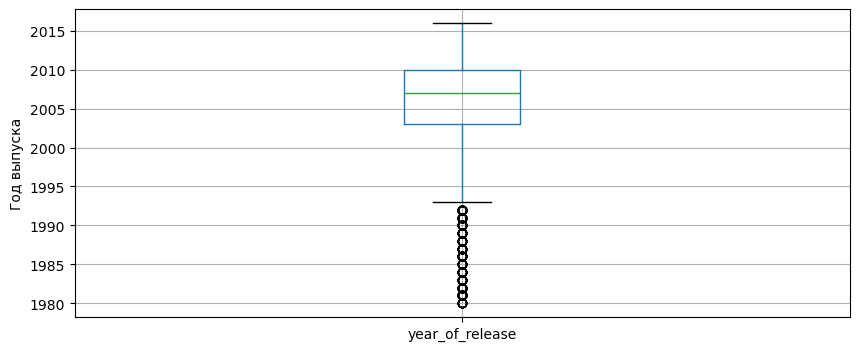

In [235]:
data.boxplot(column=['year_of_release'], figsize=(10,4), grid=True)

plt.ylabel('Год выпуска')
plt.show()

В результате группировки данных, видно, что основной скачок в выпуске игр начался с 1995 года. Пик выпуска игр приходится на период с 2005 по 2011 годы. На этот промежуток и выпадает медианное значение, что хорошо видно на графике. 

Исходя из анализа данных, прихожу к следующему выводу: Данные за все периоды не обязательно брать. Диапазон наибольшего количества выпускаемых игр, приходится с 1995 по 2016 год. 

Разумеется для исследования стоит выбирать наиболее количественные показатели в пределах этого периода.

**Построю гистограмму для большей наглядности**

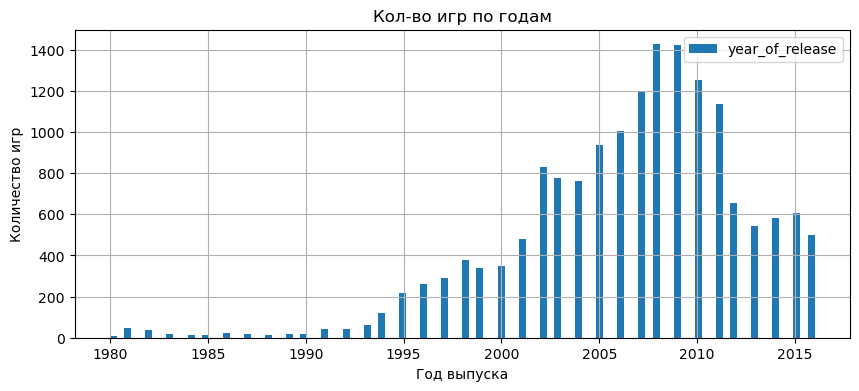

In [236]:
data.plot(kind='hist', title='Кол-во игр по годам', y='year_of_release', \
         bins=100, grid=True, figsize=(10,4))
plt.ylabel('Количество игр')
plt.xlabel('Год выпуска')
plt.show()

По графику виден плавный рост и спад выпускаемых игр. Если рост - это нормально, то спад может быть связан различными факторами. Например, уменьшение количества платформ на которых можно поиграть. Рост технологий, что осложняет создание игр, но делает ее более визуально и функционально привлекательной для пользователя. Все же в мире цифровых технологий надо уметь идти "в ногу со временем". Приходится жертвовать временем на создание игры и количеством выпускаемых игр, ради функциональности и визуализации с использованием актуальных технологий.

**Вывод**

Данные за все периоды не стоит брать. Для исследования понадобятся данные с наибольшими количественными показателями. К тому же, эти показатели , в теории, могут автоматически отсеять неактуальные платформы для игр.

### Продажи по платформам

1. Выбрать платформы с наибольшими суммарными продажами.

2. За какой характерный срок появляются новые и исчезают старые платформы?

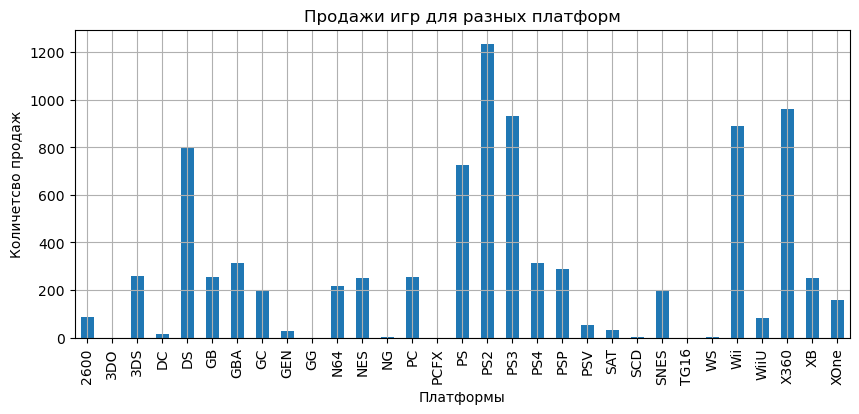

In [237]:
data.groupby('platform')['total_sales'].sum()\
.plot(title='Продажи игр для разных платформ', x='platform', y='total_sales', \
      kind='bar', grid=True, figsize=(10,4))

plt.xlabel('Платформы')
plt.ylabel('Количетсво продаж')
plt.show()

На графике видно, что по продажам значительно выделются несоклько платформ.

**Создам список из 6 платформ, которые выделяются по продажам.**

In [238]:
top = data.groupby('platform')['total_sales']\
.sum().sort_values(ascending=False).reset_index().head(6)
top

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58


**Построю граффик для наглядности**

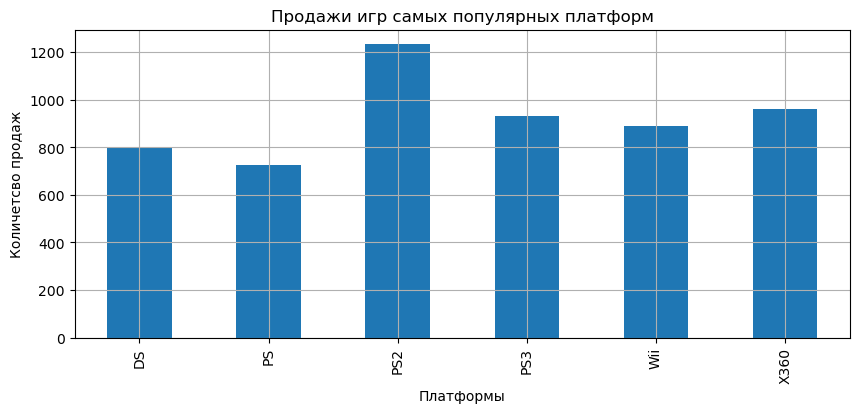

In [239]:
top.groupby('platform')['total_sales'].sum()\
.plot(title='Продажи игр самых популярных платформ', x='platform', y='total_sales', \
      kind='bar', grid=True, figsize=(10,4))

plt.xlabel('Платформы')
plt.ylabel('Количетсво продаж')
plt.show()

**Выведу значения топ-платформ по годам**

Для начала создам переменную с топом платформ по продажам, затем преобразую их в отфильтрованный датасет.

In [240]:
top_six = top['platform'].to_list()
top_six

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

In [241]:
top_platforms = data.query('platform in @top_six')
top_platforms.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


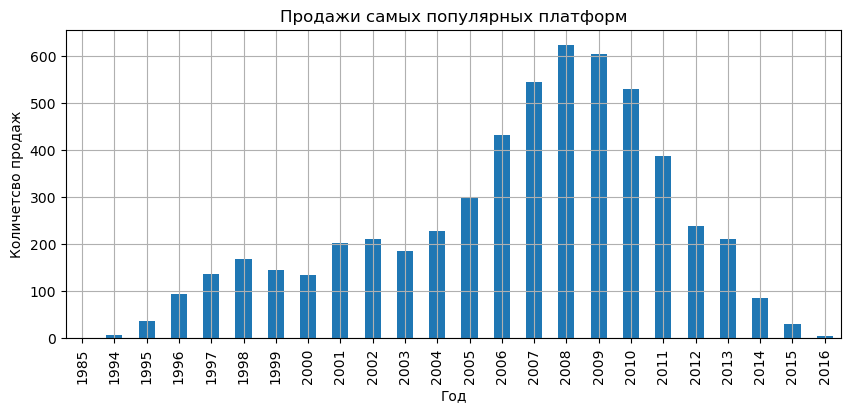

In [242]:
top_platforms.groupby('year_of_release')['total_sales'].sum()\
.plot(title='Продажи самых популярных платформ', x='year_of_release', y='total_sales', \
      kind='bar', grid=True, figsize=(10,4))

plt.xlabel('Год')
plt.ylabel('Количетсво продаж')
plt.show()

Отчетливо виден период пика продаж игр с 2006 по 2011 год.

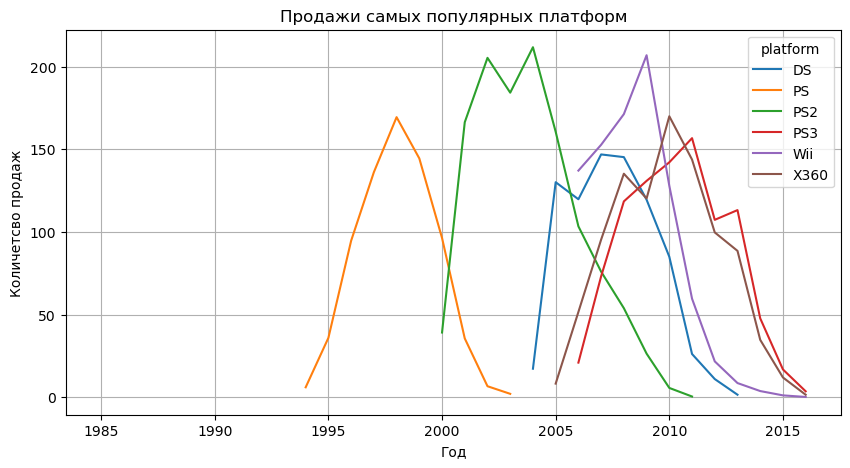

In [243]:
pd.pivot_table(top_platforms , index='year_of_release', columns='platform', \
               values='total_sales', aggfunc='sum')\
.plot(title='Продажи самых популярных платформ', grid=True, figsize=(10, 5))

plt.xlabel('Год')
plt.ylabel('Количетсво продаж')
plt.show()

Присутствует выброс в районе 1985 года. Следует избавиться от него.

In [244]:
top_platforms = top_platforms.query('year_of_release > 1985')

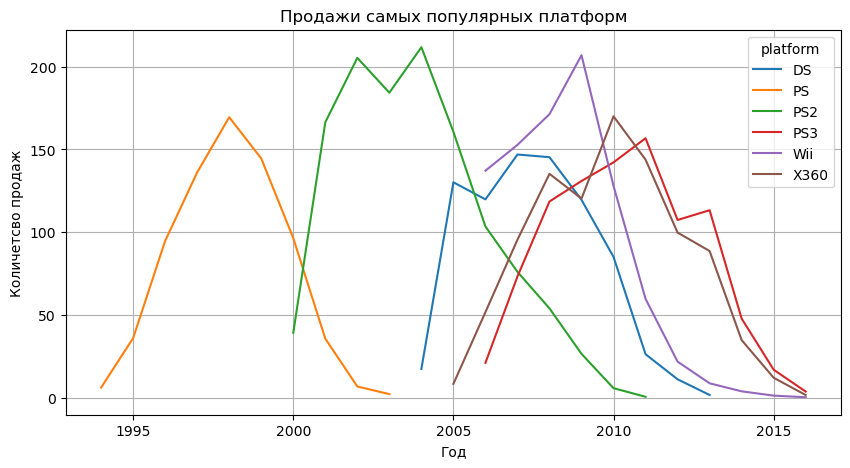

In [245]:
pd.pivot_table(top_platforms , index='year_of_release', columns='platform', \
               values='total_sales', aggfunc='sum')\
.plot(title='Продажи самых популярных платформ', grid=True, figsize=(10, 5))

plt.xlabel('Год')
plt.ylabel('Количетсво продаж')
plt.show()

### Срок за который появляются новые и исчезают старые платформы

In [246]:
platforms_life = top_platforms.groupby(['platform', 'year_of_release'])\
.agg({'total_sales':'sum'}).reset_index()
platforms_life['platform'].value_counts()

PS2     12
X360    12
PS3     11
Wii     11
DS      10
PS      10
Name: platform, dtype: int64

In [247]:
round(platforms_life['platform'].value_counts().mean(), 2)

11.0

В среднем, платформы существуют около 11 лет. 

**Вывод:** Был определен топ-6 популярных платформ. Стало известно в течении какого периода платформы остаются актуальными, в среднем это 11 лет. Для определения срока жизни, я брал платформы из топ-6, т.к. мы анализируем актуальные данные (современные), а не исторические. Для анализа данных, я считаю верным, было взять современные платформы. Данные соответствуют действительности, график выводит корректные показатели. По графику виден спад актуальности одной платформы, при появлении другой, например спад PS приходится на релиз PS2. Что так же подтверждает вывод о сроке актуальности платформы.

### Выбор актуального периода для исследования

Учитывая, что мы живем в век стремительного роста цифровых технологий, а так же и то, что в бизнесе для исследований берут данные за 3-5 лет, я решил взять медианное значение в 3 года, т.е. 2014, 2015, 2016 годы. Это автоматически отсеит "мертвые" платформы и оставит только актуальные данные.

Брать более большой период считаю нецелесобразным. Т.к. будут учитываться неактуальные платформы, что может искозить результаты исследования.

In [248]:
actual_data = data.query('year_of_release > 2013')
actual_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1.0,-1.0,unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,unknown,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01


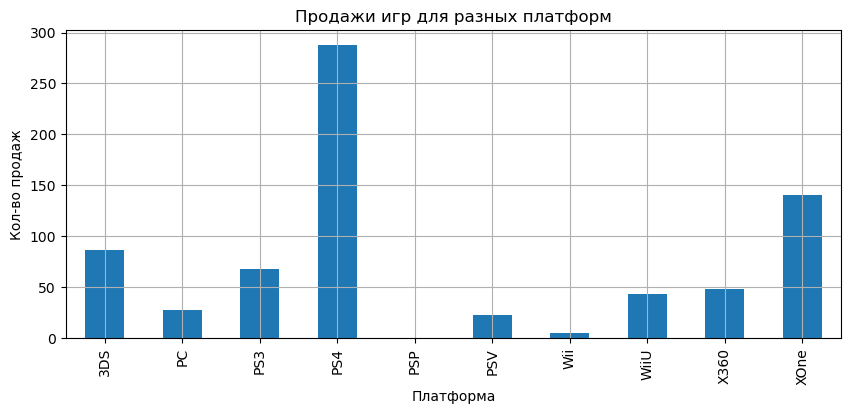

In [249]:
actual_data.groupby('platform')['total_sales'].sum()\
.plot(title='Продажи игр для разных платформ', x='platform', y='total_sales', \
      kind='bar', grid=True, figsize=(10,4))

plt.xlabel('Платформа')
plt.ylabel('Кол-во продаж')
plt.show()

Какие платформы лидируют по продажам, растут или падают? Выберавть несколько потенциально прибыльных платформ.

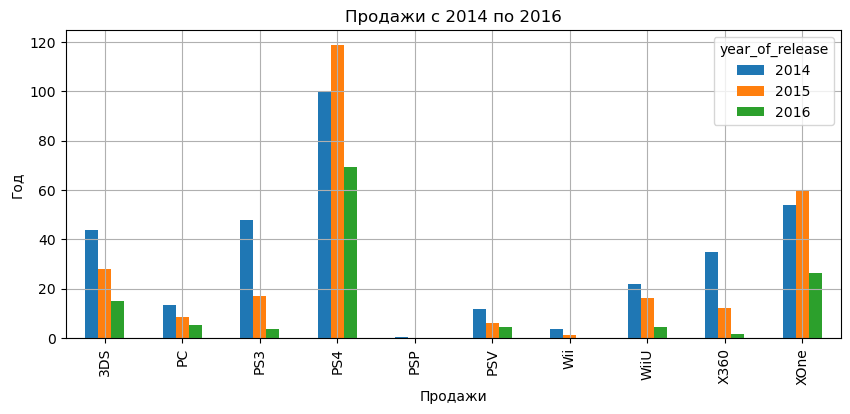

In [250]:
pd.pivot_table(actual_data, index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')\
.plot(kind='bar', title='Продажи с 2014 по 2016', grid=True, figsize=(10,4))

plt.xlabel('Продажи')
plt.ylabel('Год')
plt.show()

Очедивно выделяются PS4 и XOne, что и подтверждает их статус самых популярных и конкурирующих друг с другом платформ. В графике видны и портативные платформы, такие как: 3DS, WiiU(2011-2017), PSV(2011). Так же возьму игры на обычном компьютере (PC). Из-за того, что на компьютере можно поиграть в любые игры, отсутствует привязка к строгой адаптивности. Имею в виду, что игры выходящие на платформах можно поиграть и на компьютере. Но не все игры, которые на компьютере, можно поиграть на консолях. К тому же, некоторые производители выпускают игры на свою платформу и на пк. 

Топ актуальных платформ: **PS4, XOne, 3DS, WiiU, PSV, PC.**

### Платформы лидирующие по продажам

In [251]:
new_top = actual_data.groupby('platform')['total_sales']\
.sum().sort_values(ascending=False).reset_index().head(10)
new_top

,platform,total_sales
0,PS4,288.15
1,XOne,140.36
2,3DS,86.68
3,PS3,68.18
4,X360,48.22
5,WiiU,42.98
6,PC,27.05
7,PSV,22.40
8,Wii,5.07
9,PSP,0.36


**Для исследования создам список из топ-платформ и присвою значения из датафрейма.**

In [252]:
actual_top_platforms = ['PS4', '3DS', 'XOne', 'WiiU', 'PSV', 'PC', 'PS3', 'X360', 'Wii', 'PSP']

In [253]:
actual_top_platforms = data.query('platform in @actual_top_platforms')
actual_top_platforms

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
...,...,...,...,...,...,...,...,...,...,...,...,...
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01


### Отфильтрую датафрейм в рамках выбранного периода (с 2014 по 2016 гг.)

In [254]:
actual_top_platforms_data = actual_top_platforms.query('year_of_release > 2013').reset_index()
actual_top_platforms_data

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,unknown,14.63
1,42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1.0,-1.0,unknown,11.68
3,77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,unknown,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1684,16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01
1685,16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01
1686,16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01
1687,16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01


**Выведу в графике продажи топ-6 платформ**

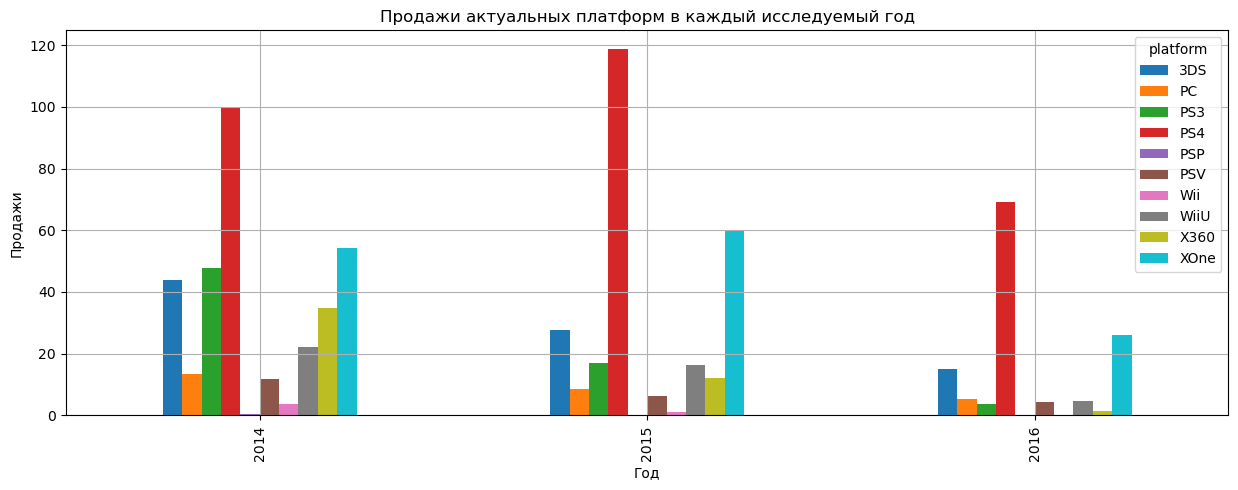

In [255]:
pd.pivot_table(actual_top_platforms_data, index='year_of_release', \
               columns='platform', values='total_sales', aggfunc='sum')\
.plot(kind='bar', title='Продажи актуальных платформ в каждый исследуемый год', grid=True, figsize=(15,5))\

plt.xlabel('Год')
plt.ylabel('Продажи')
plt.show()

### Вывод о продажам по годам

В рамках исследуемых годов, видно, что лидирую позицию по продажам занимает консоль PS4, практически в два раза меньше продаж у XOne. Возможно это связанно с эксклюзивными играми, которые выходят только под определенную платформу, в данном случае под Playstation. Так же не стоит исключать, что Playstation как консоль, вышла гораздо раньше, чем первый Xbox, что может сказывается на популярности приставки. Playstation вышла 1994 г. в Японии и появилась на рынках США и Европы в 1995г., тогда как Xbox вышла на рынок в 2001 году.

Лидерство среди портативных приставок удерживает 3DS от компании Nintendo, оставляя за собой WiiU и PSV. 

Отчетливо виден сильный спад продаж платформы WiiU. Если бы мы исследовали современные/актуальные данные, я бы сделал предположение о том, что спад продаж может быть связан с релизом у конкурентов портативной консоли нового поколения. 

*Но, т.к. производится анализ довольно старых данных (если иметь в виду сферу цифровых технологий), я прогуглил причину спада продаж WiiU. В 2017 году было прекращено производство данной платформы, т.к. готовилась к выходу новая приставка Nintendo Switch. Что и подтвердило бы мою теорию. Только я предполагал релиз от конкурентов, а на самом деле Nintendo решили упразднить WiiU в пользу Nintendo Switch.*

*P.S. Это просто мысли автора, не имеющие отношение к анализу.*

### Показатели общих продаж за период с 2014 по 2016 гг.

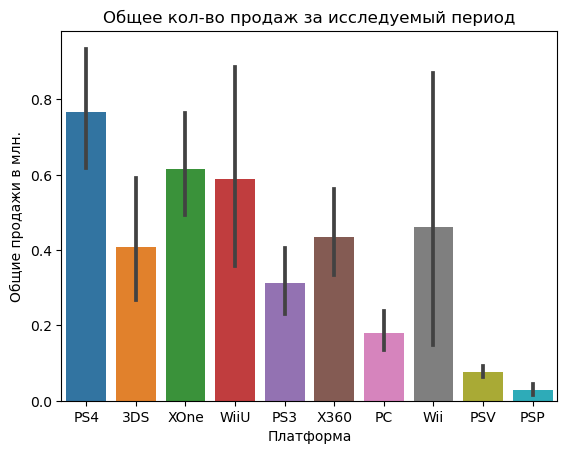

In [256]:
sns.barplot(data=actual_top_platforms_data, x='platform', y='total_sales')

plt.title('Общее кол-во продаж за исследуемый период')
plt.xlabel('Платформа')
plt.ylabel('Общие продажи в млн.')
plt.figsize=(10,10)
plt.show()

**Построю "ящик с усами"**

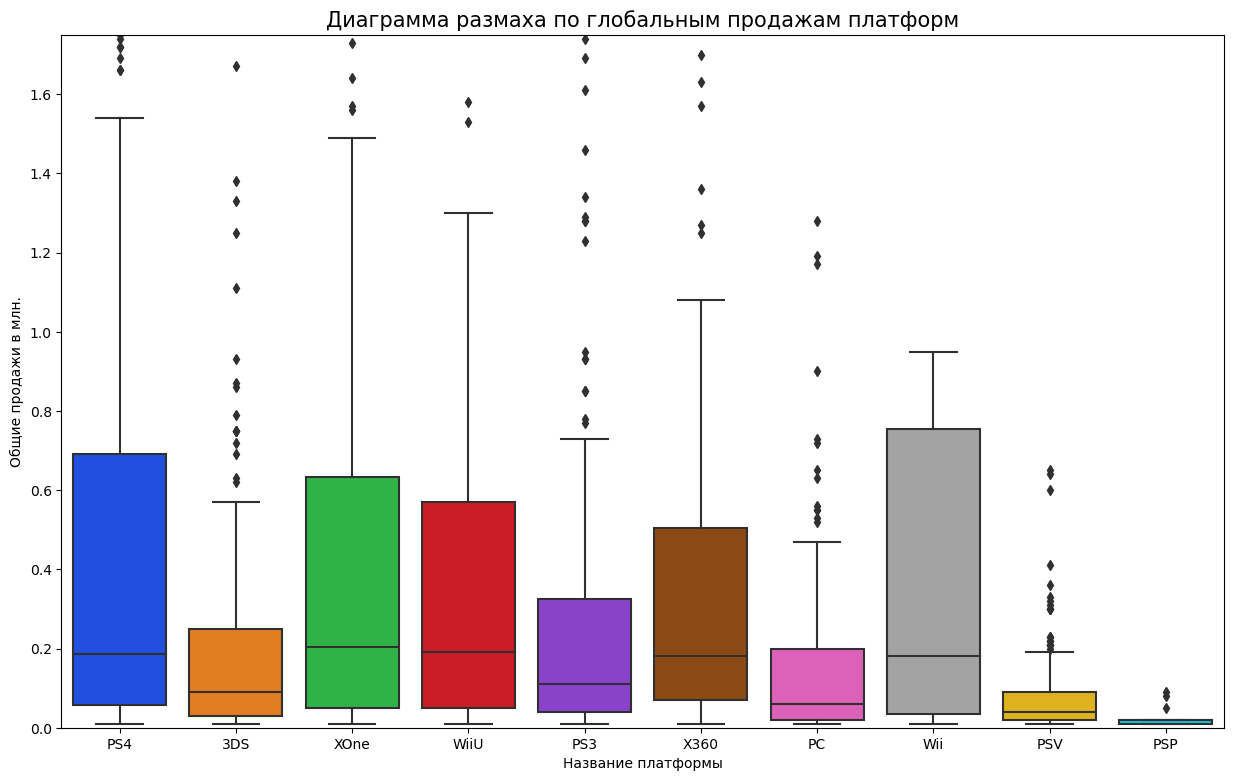

In [257]:
plt.figure(figsize=(15, 9))
plt.ylim(0, 1.75)
sns.boxplot(x="platform", y="total_sales", data = actual_top_platforms_data , palette='bright')
plt.title('Диаграмма размаха по глобальным продажам платформ', fontsize=15)

plt.ylabel('Общие продажи в млн.')
plt.xlabel('Название платформы')
plt.show()

### Вывод о продажах за исследуемый период

Высокие показатели продаж у платформы **Wii, PS4, XOne, WiiU, X360**

Неплохие показатели продаж на платформах **PS3, 3DS**  и на **PC**.

### Диаграмма рассеяния и корреляция между отзывами и продажами одной популярной платформы

Т.к. в условиях задания написанно использовать одну платформу, считаю логичным рассмотреть платформу с наибольшими рузельтативными показателями, т.е. **PS4**

**Создам переменную с нужными для анализа параметрами.**

In [298]:
PS4_for_corr = actual_top_platforms_data.query('platform == "PS4"')
# для расчета корреляции избавлюсь от любых видов заглушек
PS4_for_corr = PS4_for_corr.query('critic_score > 0 and user_score > 0')
PS4_for_corr.reset_index().head()

,level_0,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,1,42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
1,3,77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
2,5,92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
3,6,94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
4,9,105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


**Теперь из полученных данных можно построить диаграмму рассеяния**

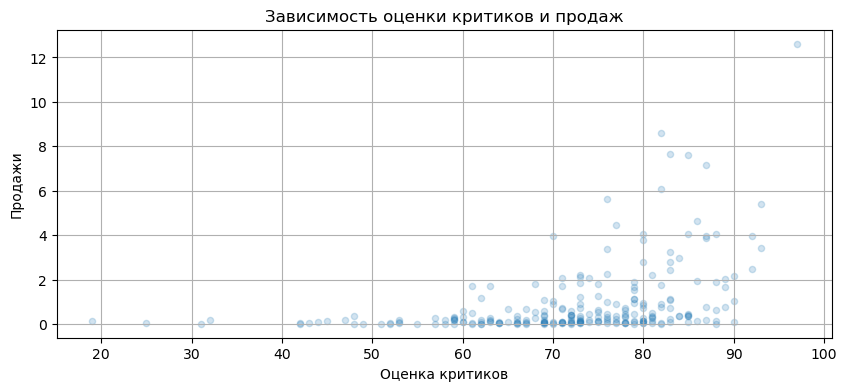

In [262]:
PS4_for_corr.plot(title='Зависимость оценки критиков и продаж',\
                  kind='scatter', x='critic_score', y='total_sales', \
                  figsize=(10,4), alpha=0.2, grid=True)

plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')
plt.show()

**Коэффициент корреляции**

In [263]:
round(PS4_for_corr['critic_score'].corr(PS4_for_corr['total_sales']), 2)

0.4

**Вывод:**

По графику видно, что зависимость есть, хоть и небольшая. Этот вывод положительный коэффициент корреляции Пирсона, который имеет положительное значение.

**Зависимоть продаж от оценки пользователей**

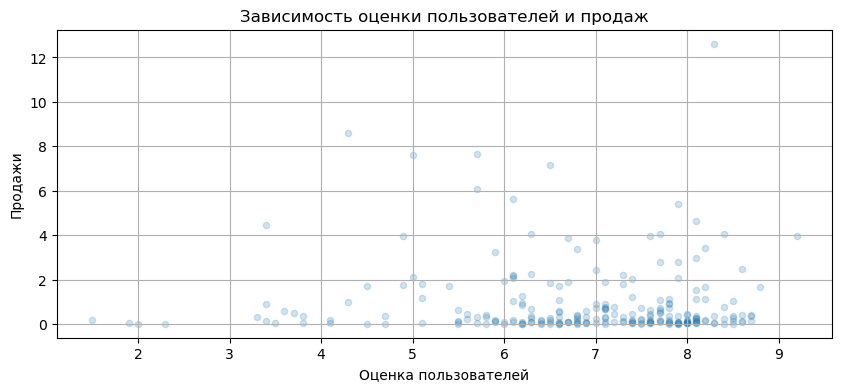

In [265]:
PS4_for_corr.plot(title='Зависимость оценки пользователей и продаж',\
                  kind='scatter', x='user_score', y='total_sales', \
                  figsize=(10,4), alpha=0.2, grid=True)

plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
plt.show()

**... и посчитаем коэффициент корреляции**

In [266]:
round(PS4_for_corr['user_score'].corr(PS4_for_corr['total_sales']), 2)

-0.04

Коэффициент корреляции отрицательный. Доказывающий отсутствие зависимости продаж от оценки пользователей. 

Выходит, что независимо от кол-ва пользователей и их отзывах, на продажи оказыввают влияние именно оценка критиков.

### Вывод

Коэффициент имеет положительное значение. Зависимость присутствует. Но, если взглянуть на график, можно сказать, что гораздо большее влияние на продажи имеет оценки пользователей, чем критиков. Что обусловливает некоторый разброс в продажах. Безусловно мнение критиков важно, но есть предположение, что пользователи больше доверяют таким же пользователям, как и они сами. Тем самым, оценки пользователей могут нести не меньшую ценность, чем оценки критиков.  В добавок, не могу исключить и то, что критики - это в первую очередь профессионалы, с хорошим бэкграундом в индустрии. Соответственно критик - еденица не такая полпулярная. Тогда как пользователей очевидно больше, отзывов и оценок они могут дать больше, что и повлияет на выбор потенциального покупателя и приведет в итоге к росту продаж.

### Посмотрю на коэффициент корреляции для остальных платформ платформ

In [267]:
data_for_corr = actual_top_platforms_data.query('critic_score > 0 and user_score > 0')

3DS
critic_score    0.284686
user_score      0.279850
total_sales     1.000000
Name: total_sales, dtype: float64


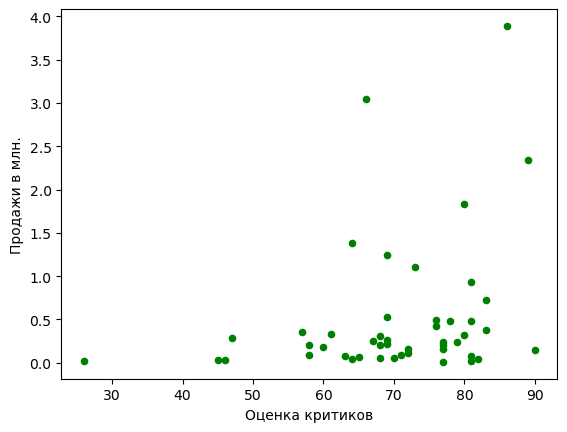

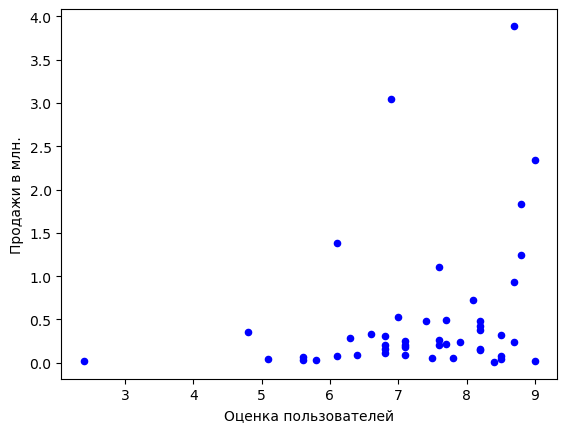

PC
critic_score    0.172061
user_score     -0.089974
total_sales     1.000000
Name: total_sales, dtype: float64


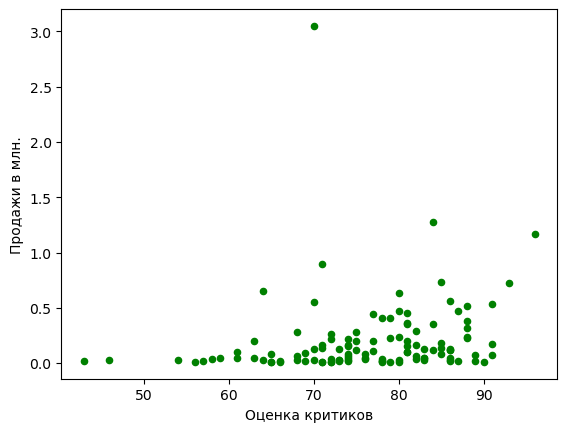

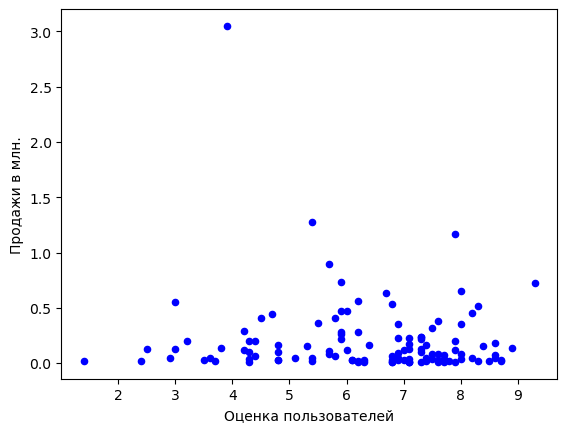

PS3
critic_score    0.446575
user_score      0.156595
total_sales     1.000000
Name: total_sales, dtype: float64


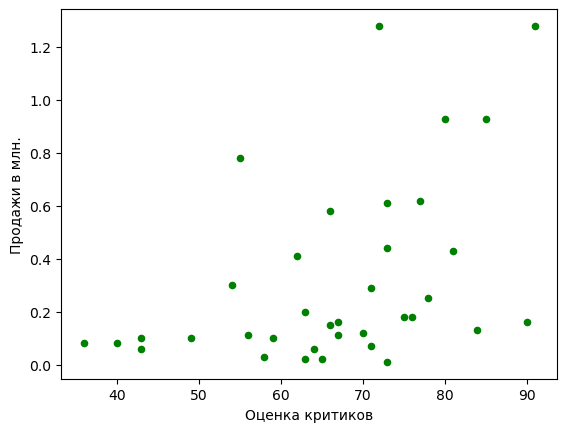

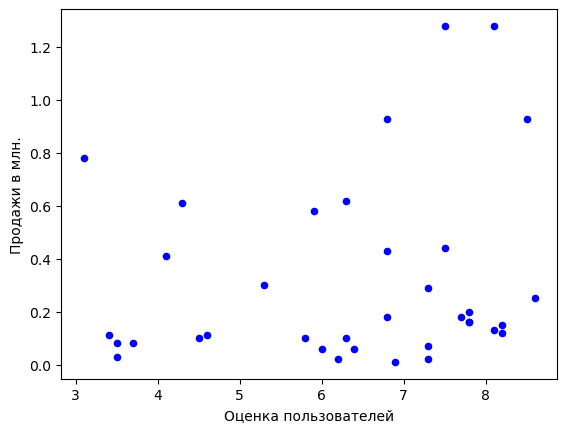

PS4
critic_score    0.401903
user_score     -0.043186
total_sales     1.000000
Name: total_sales, dtype: float64


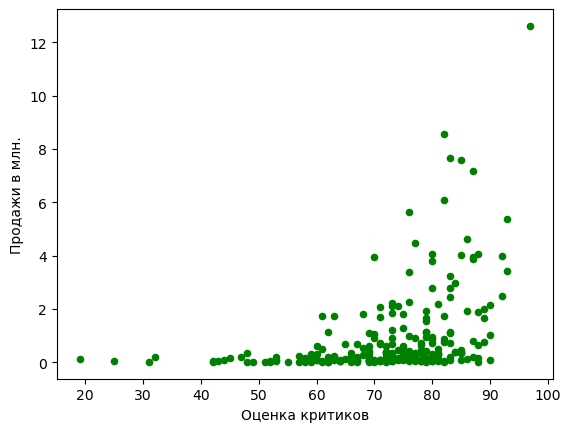

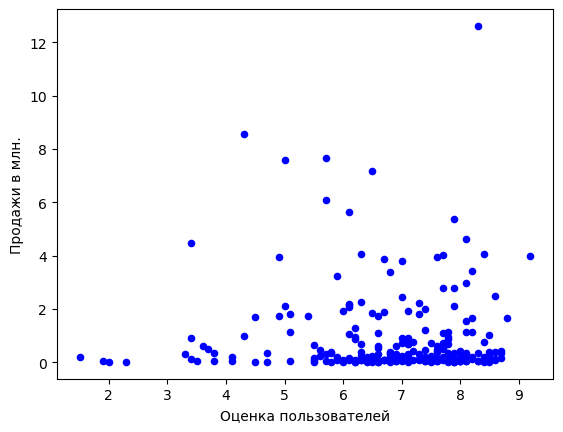

PSV
critic_score    0.041029
user_score      0.023528
total_sales     1.000000
Name: total_sales, dtype: float64


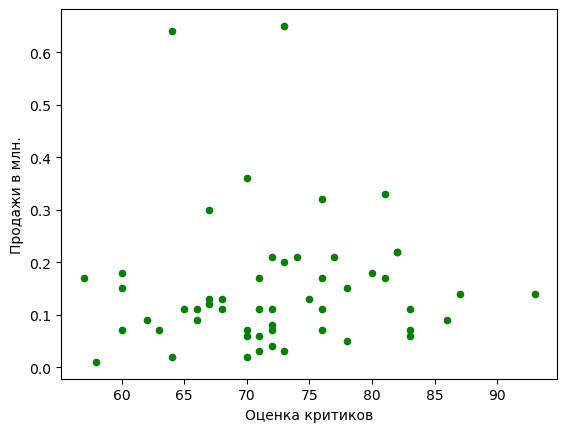

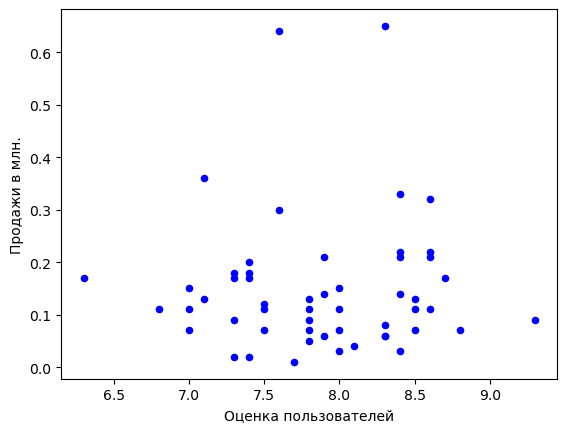

WiiU
critic_score    0.375640
user_score      0.411451
total_sales     1.000000
Name: total_sales, dtype: float64


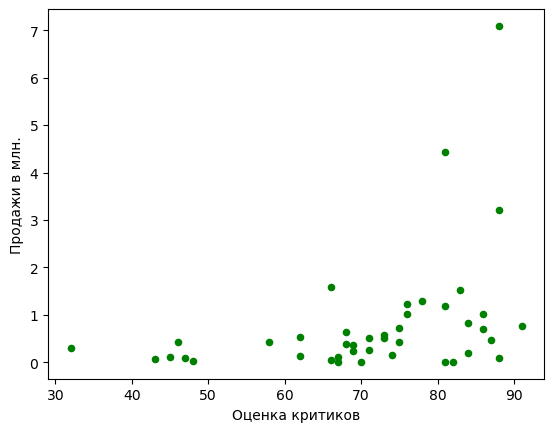

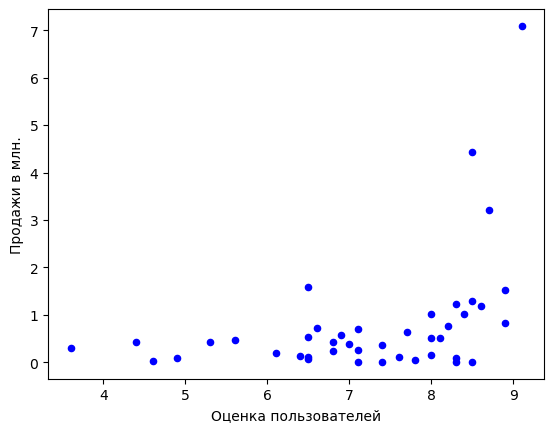

X360
critic_score    0.525723
user_score      0.336514
total_sales     1.000000
Name: total_sales, dtype: float64


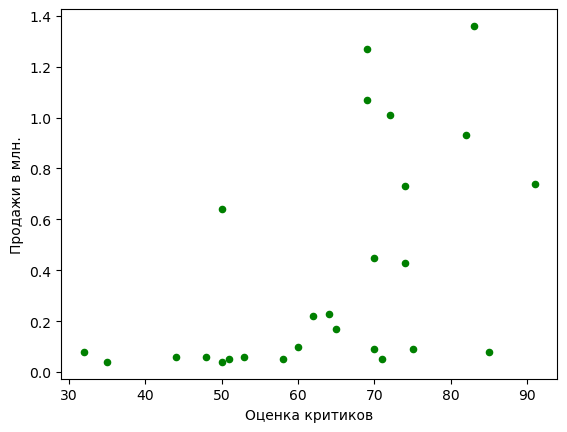

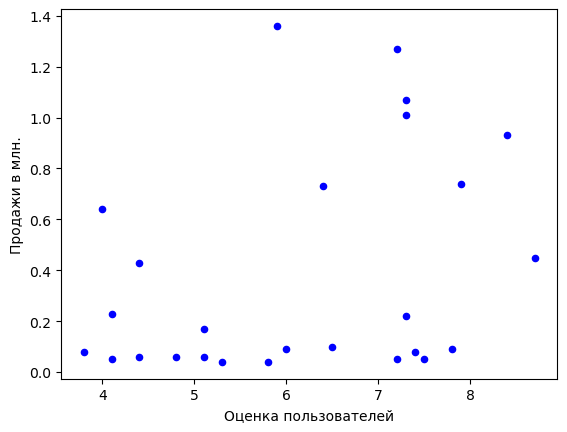

XOne
critic_score    0.422112
user_score     -0.091734
total_sales     1.000000
Name: total_sales, dtype: float64


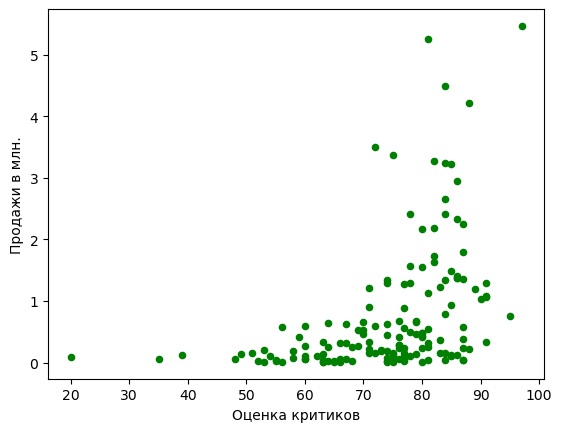

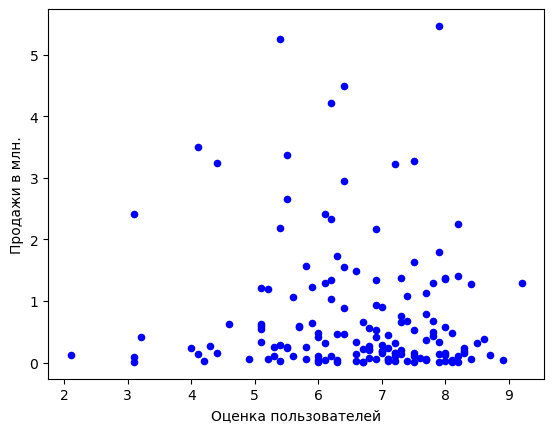

In [269]:
for platform, games in data_for_corr.groupby('platform'):
    print(platform)
    print(games[['critic_score', 'user_score', 'total_sales']].corr()['total_sales'])
    games.plot(kind='scatter', x='critic_score', y='total_sales', color='green')
    plt.xlabel('Оценка критиков')
    plt.ylabel('Продажи в млн.')
    games.plot(kind='scatter', x='user_score', y='total_sales', color='blue')
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Продажи в млн.')
    plt.show()

### Вывод

**3DS**
    
critic_score    0.284686
    
user_score      0.279850

Коэффициенты корреляции положительные. Зависимость присутствует.
    
**PC**
    
critic_score    0.172061
    
user_score     -0.089974

Оценка критиков имеет небольшой, но положительный показатель. Есть зависимость.
    
Оценка пользователей имеет отрицательный показатель. Что показывать отсутствие зависимости продаж от отзывов.
    
**PS3**
    
critic_score    0.446575
    
user_score      0.156595
    
Коэффициенты корреляции положительные. Более значимый показатель у критиков, что доказывает значительную зависимость их оценки на продажи, нежели оценки пользователей.
    
**PS4**
    
critic_score    0.401903
    
user_score     -0.043186
    
Оценка критиков имеет положительный показатель. Есть зависимость.
    
Оценка пользователей имеет отрицательный показатель. Что показывать отсутствие зависимости продаж от отзывов.
    
**PSV**
    
critic_score    0.041029
    
user_score      0.023528
    
Коэффициенты корреляции положительные. Зависимость присутствует.
    
**WiiU**
    
critic_score    0.375640
    
user_score      0.411451
    
Коэффициенты корреляции положительные. Зависимость присутствует. Можно сказать, что оценка критиков и оценка пользователей имеет не маловажную роль для продаж.
    
**X360**
    
critic_score    0.525723
    
user_score      0.336514
    
Коэффициенты корреляции положительные. Зависимость присутствует. Можно сказать, что оценка критиков и оценка пользователей имеет не маловажную роль для продаж. но по показателям, бОльшую роль играют оценки критиков.
    
**XOne**
    
critic_score    0.422112
    
user_score     -0.091734
    
Оценка критиков имеет положительный показатель. Есть зависимость.
    
Оценка пользователей имеет отрицательный показатель. Что показывать отсутствие зависимости продаж от отзывов.

### Распределение игр по жанрам. Самые прибыльные жанры. Выделяются ли жанры с высокими и низкими продажами

Выведу общее кол-во игр по жанрам

In [270]:
actual_top_platforms_data['genre'].value_counts()

Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: genre, dtype: int64

In [271]:
profit_genres = actual_top_platforms_data.groupby(['genre'])\
                        .agg({'total_sales':'sum', 'name':'count'})\
                        .rename(columns={'name':'count'})\
                        .sort_values(by='total_sales', ascending=False)
profit_genres

,total_sales,count
genre,,
Action,199.36,619
Shooter,170.94,128
Sports,109.48,161
Role-Playing,101.44,221
Misc,37.55,113
Fighting,28.22,60
Racing,27.52,69
Platform,18.09,38
Adventure,17.55,185


**Выведу получившуюся таблицу на график**

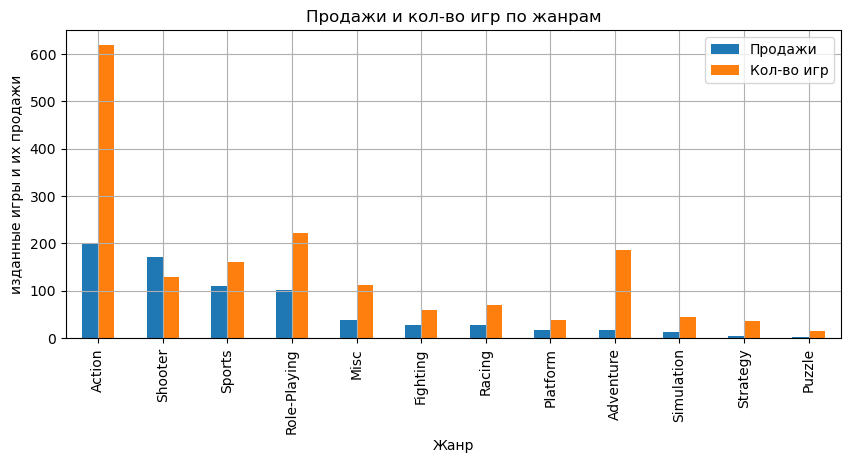

In [272]:
ax=profit_genres[['total_sales', 'count']]\
.sort_values(by='total_sales', ascending=False)\
.plot(title='Продажи и кол-во игр по жанрам', kind='bar',\
      grid=True, figsize=(10, 4))
plt.xlabel('Жанр')
plt.ylabel('изданные игры и их продажи')
plt.legend(['Продажи', 'Кол-во игр'])

plt.show()

**Вывод:**

По графику видно самые популярные относительно продаж жанры:

1. Action
2. Shooter
3. Role-Playing
4. Sports

Вывод о прибыльности неоднозначен. С одной стороны больше продаж в жанре Action, с другой выпускаемых игр этого жанра подавляющее большинство от остальных жанров. Могу считать прибыльынми жанрами те, у которых показатели га графике приближены друг к другу. 

Очевидный прибыльный жанр - Shooter. Продажи выше, чем самих игр. Любители стрелялок, сместили даже любителей жанра Sports. Считаю, что лидеры графика, могут является прибыльными жанрами. Так же хорошие показатели в жанре Fighting.

Жанры: Adventure, Misc, Simulation, Strategy, Pazzle не могу отнести к прибыльным. 

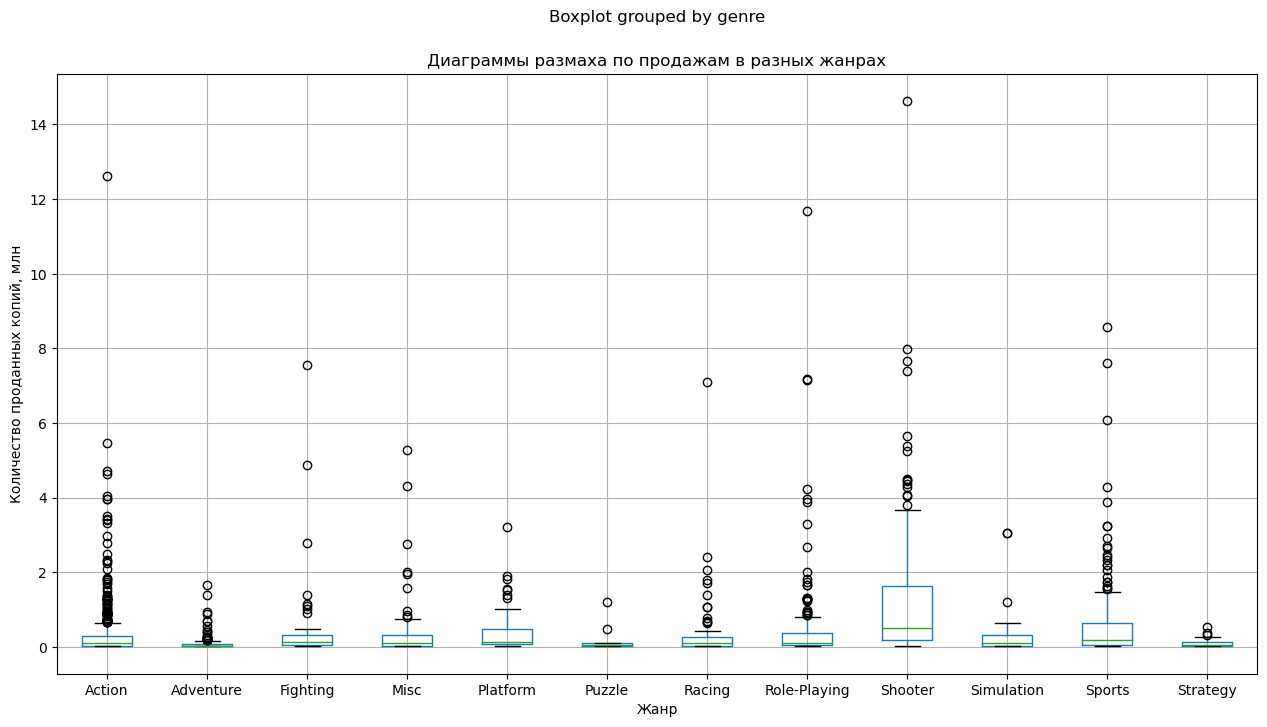

In [273]:
actual_top_platforms_data[['total_sales', 'genre']]\
.boxplot(column='total_sales', by='genre', figsize=(15,8))

plt.xlabel('Жанр')
plt.ylabel('Количество проданных копий, млн')
plt.title('Диаграммы размаха по продажам в разных жанрах')
plt.show()

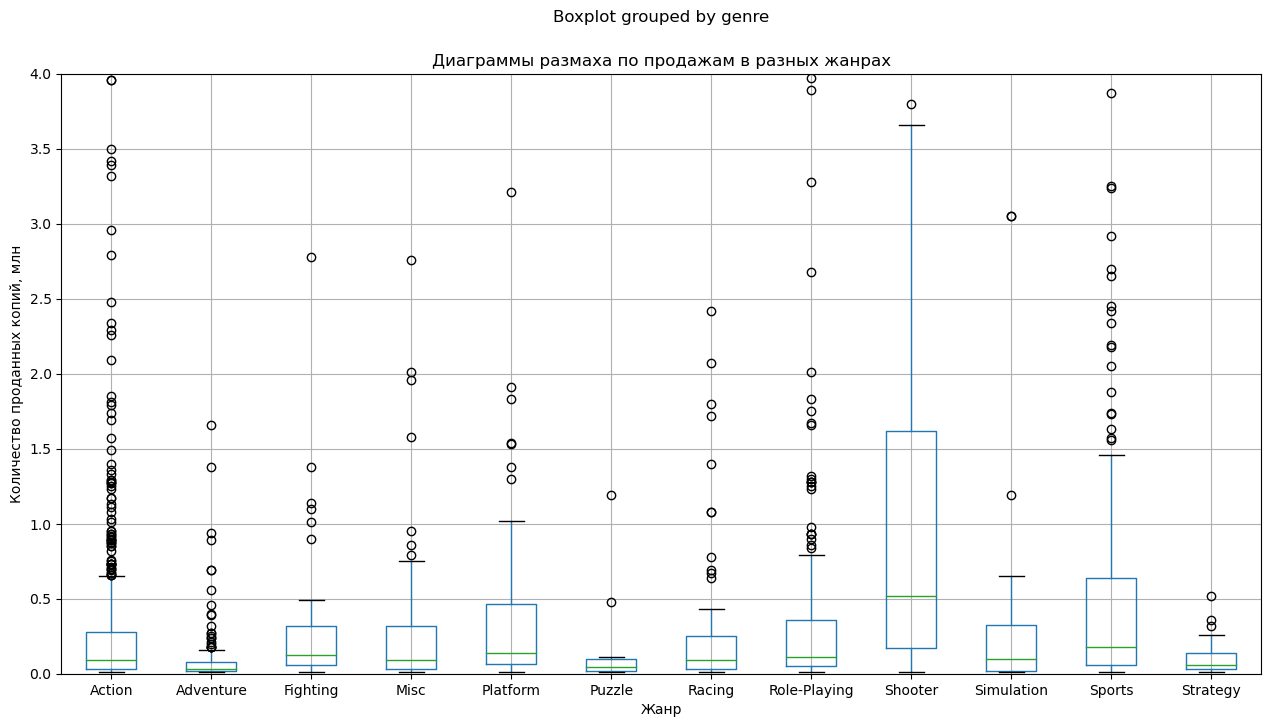

In [274]:
actual_top_platforms_data[['total_sales', 'genre']]\
.boxplot(column='total_sales', by='genre', figsize=(15,8))

plt.xlabel('Жанр')
plt.ylabel('Количество проданных копий, млн')
plt.title('Диаграммы размаха по продажам в разных жанрах')
plt.ylim(0, 4)
plt.show()

In [275]:
display(actual_top_platforms_data
        .pivot_table(index='genre', values='total_sales', aggfunc=['sum', 'mean', 'median', 'count'])
        .reset_index().sort_values(('median', 'total_sales'), ascending=False))

,genre,sum,mean,median,count
,,total_sales,total_sales,total_sales,total_sales
8,Shooter,170.94,1.335469,0.515,128
10,Sports,109.48,0.680000,0.180,161
4,Platform,18.09,0.476053,0.140,38
2,Fighting,28.22,0.470333,0.125,60
7,Role-Playing,101.44,0.459005,0.110,221
9,Simulation,13.13,0.298409,0.100,44
0,Action,199.36,0.322068,0.090,619
3,Misc,37.55,0.332301,0.090,113
6,Racing,27.52,0.398841,0.090,69


### Вывод

Самый прибыльный жанр Shooter, он имеет и самое большое медианное значение. Второй по прибыльности жанр Sports. Несмотря на популярность жанра Action, его продажи и соответственно прибыльность сильно уступает Shooter и Sports, хотя имеет самое большое количество продаж.

### Вывод по разделу

Диапазон наибольшего количестве выпускаемых игр, приходится с 1995 по 2016 год.

Для исследования выбирал данные за последние 3 года с 2014 по 2016 гг.

Определены самые популярные платформы: PS2, X360, PS3, WiiU, DS, PS.

Определен средний срок жизни платформы  ~ 11 лет.

Выяснилось, что зависимость от оценки критиков и пользователей на продажи присутствует на всех платформах, Невысокая, но она есть. 

Определены самые прибыльные жанры игр.

## Портрет пользователя для каждого региона

**Лучше всего, портрет составит круговая диаграмма**

### Возьму данные за исследуемый период с 2014 по 2016 гг.

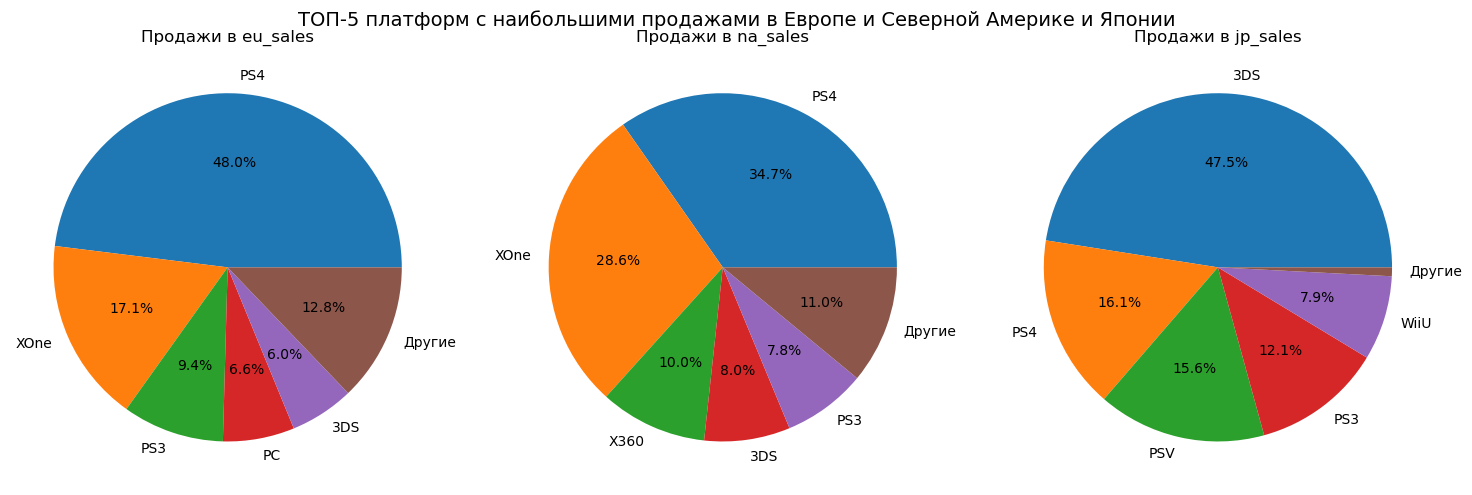

In [276]:
actual_top_platforms_list = ['eu_sales', 'na_sales', 'jp_sales']
fig, ax = plt.subplots(1, len(actual_top_platforms_list), figsize=(15,5))
for i, region in enumerate(actual_top_platforms_list):
    region_platform = data.query('year_of_release > 2013').groupby('platform').agg({region: 'sum'})\
    .sort_values(by=region, ascending=False).reset_index()
    
    region_platform.loc[5] = ['Другие', region_platform.loc[5:][region].sum().round(2)]
    region_top_platform = region_platform.head(6)     
    
    ax[i].pie(region_top_platform[region], labels=region_top_platform['platform'], \
              autopct=lambda x: f'{x:.1f}%' if x > 5 else None)
    ax[i].set_title((f'Продажи в {region}'))
    
plt.suptitle('ТОП-5 платформ с наибольшими продажами в Европе и Северной Америке и Японии', fontsize=14)
plt.tight_layout()
plt.show()

### Вывод

По графикам видно, что в Европе практически 50% продаж приходится на PS4. Значительно остатет по продажам XOne. Достаточно конкуурентный рынок.

В Северной Америке немного иная картина. В лидерах остается PS4. Процент продаж, относительно Европейского рынка, достаточно ощутимо отличается и составляет практически 35%. Продажи на XOne В Северной Америке приближеные к продажам на PS4. Не могу исключать, что подобные количественные показатели у XOne из-за "поддержки отечественного производителя" американцами. Мое мнение, что это хорошо конкурентный рынок, где шансы могут быть у всех.

Рынок Японии координально отличается от Европы и Северной Америки.  47.5% продаж приходится на 3DS. Оставляя за собой, практически в равных долях PS4, PSV, PS3. Вывод по Японии двойной:
1. Очевидна тенденция у японцев к портативным платформам. Возможно эта тенденция из-за бешенного ритма жизни, в котором не успеваешь найти время, чтобы посидеть дома за приставкой. 
2. Виден четкий след захвата рынка платформ отечественными производителями. Очень сложно проникнуть на Японский рынок Европейским компаниям. 

Монополия по местным брендам)

### Самые популярные жанры топ-5

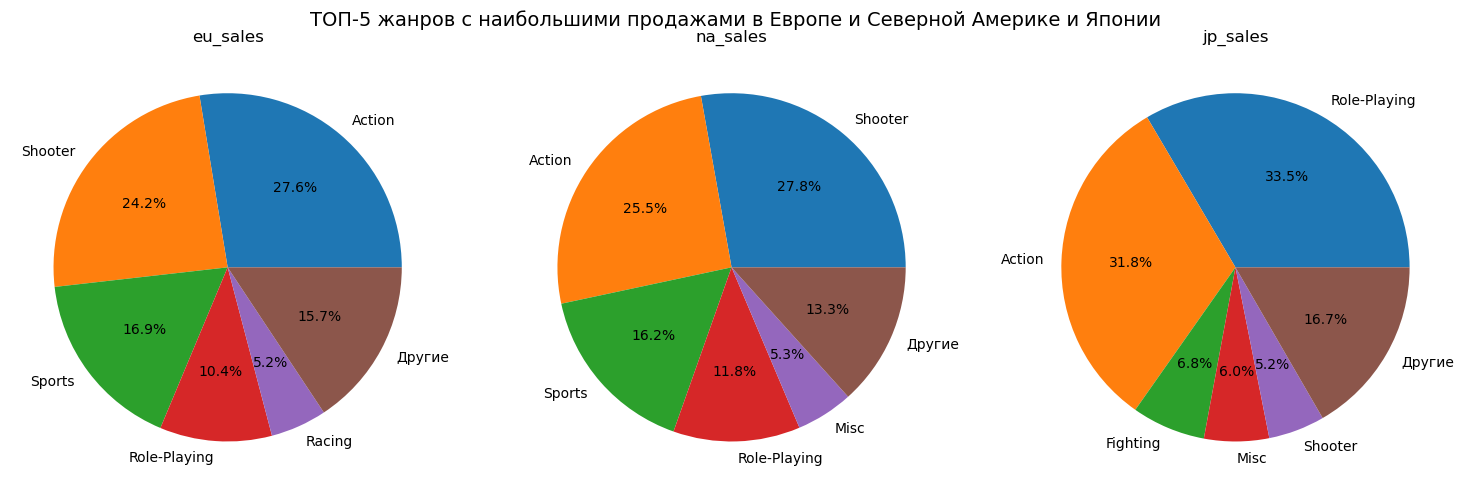

In [277]:
actual_top_platforms_list = ['eu_sales', 'na_sales', 'jp_sales']
fig, ax = plt.subplots(1, len(actual_top_platforms_list), figsize=(15,5))
for i, genres in enumerate(actual_top_platforms_list):
    region_genres = data.query('year_of_release > 2013').groupby('genre').agg({genres: 'sum'})\
    .sort_values(by=genres, ascending=False).reset_index()
    
    region_genres.loc[5] = ['Другие', region_genres.loc[5:][genres].sum().round(2)]
    region_top_genres = region_genres.head(6)     
    
    ax[i].pie(region_top_genres[genres], labels=region_top_genres['genre'], \
              autopct=lambda x: f'{x:.1f}%' if x > 5 else None)
    ax[i].set_title(genres)
    
plt.suptitle('ТОП-5 жанров с наибольшими продажами в Европе и Северной Америке и Японии', fontsize=14)
plt.tight_layout()
plt.show()

### Вывод

Очень похожая картина по жанрам между Европой и Северной Америкой. 

В Европе преобладают жанры Action(27.6%), Shooter(24.2%) и Sports(16.9%).

В Сервеной Америке преобладают жанры Shooter(27.8%), Action(25.5%) и Sports(16.2%). 

Примечетельно, что в Европе доля ~5% приходится на игры в жанре Racing. Тогда как в Серверной Америке ~5% приходится на игры в жанре Misc.

Совсем иная картина на Японском рынке. Практически в равных долях делят рынок жанры Role-Playing(33.5%) и Action(31.8%). Практически равные доли разделили жанры Fighting(6.8%), Misc(6%), Shooter(5.2%).

Если игры в жарне Action популярны во всем мире, то вместо шутеров, Японцы больше отдают предпочтение играм в жанре Role_Playing.

In [278]:
actual_top_platforms_data.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,unknown,14.63
1,42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1.0,-1.0,unknown,11.68
3,77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,unknown,7.98


### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**Выведу все уникальные значения в столбце "rating" и расшифрую аббревиатуры**

In [279]:
actual_top_platforms_data['rating'].unique()

array(['unknown', 'M', 'E', 'T', 'E10+'], dtype=object)

Прогуглив, получились следующие определения рейтингов:

- **"M"(Mature)** - для лиц старше 17 лет
- **"E"(Everyone)** - для всех
- **"T"(Teen)** - подросткам от 13 лет
- **"E10+"(Everyone 10 and older)** - для всех старше 10 лет
- **"unknown"** - "заглушка" для не заполненных ячеек в датафрейме 

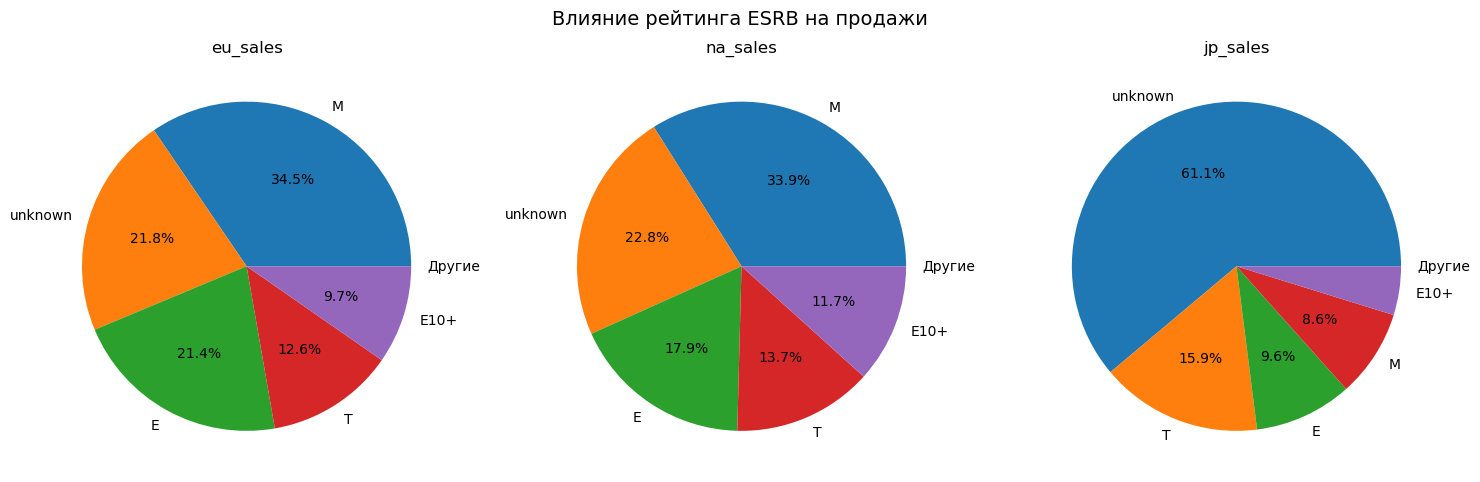

In [280]:
actual_top_platforms_list = ['eu_sales', 'na_sales', 'jp_sales']
fig, ax = plt.subplots(1, len(actual_top_platforms_list), figsize=(15,5))
for i, genres in enumerate(actual_top_platforms_list):
    region_genres = data.query('year_of_release > 2013').groupby('rating').agg({genres: 'sum'})\
    .sort_values(by=genres, ascending=False).reset_index()
    
    region_genres.loc[5] = ['Другие', region_genres.loc[5:][genres].sum().round(2)]
    region_top_genres = region_genres.head(6)     
    
    ax[i].pie(region_top_genres[genres], labels=region_top_genres['rating'], \
              autopct=lambda x: f'{x:.1f}%' if x > 5 else None)
    ax[i].set_title(genres)
    
plt.suptitle('Влияние рейтинга ESRB на продажи', fontsize=14)
plt.tight_layout()
plt.show()

### Вывод

В Европе и Северной Америке видно влияние рейтинга на продажи. Преобладает рейтинг **M** - для лиц старше 17 лет. Большая часть продаж в Европейском и Американском рынках приходится на жанры "Action" и "Shooters". Данным жанрам как раз присваивается жесткий возрастной рейтинг из-за оболия стрельбы, крови и тд в играх. Рейтинг **E** и **T**, так же показывает свое влияние на продажи в Европе и Северной Америке.

Выделяется Япония. Больше 60% приходится на "заглушки", возможно это связано с неприсвоением рейтинга играм выпущенным на популярную для Японии консоль (**3DS**). Присутствует влияние на продажи рейтинга **T** и **E**. 

Можно сделать вывод, что рейтинг ESRB влияет на рынок Европы и Северной Америки.

Надо учесть и то, что не маленькую долю для всех регионов составляют "заглушки". Это связано с тем, что за 2016г. представленны непольные данные. 

### Вывод по разделу

**Портрет пользователя для каждого региона.** 

**Для Европы и Северной Америки самымы популярныи платформами являются:** 

1. PS4
2. XOne
3. PS3 (для Европы), X360 (для Северной Америки)

В Японии рынок наполнен "отечественными" платформами. Но рейтинг платформ Японского рынка отличается от Европейского и Американского:

1. 3DS
2. PS4
3. PSV

Выявленно, что в Японии больше портатвных платформ.

**Жанры:**

В Европе и Северной Америке, практически в равных долях, делят 2 самых популярных жанрав Action и Shooters.

В Японии немного другая ситуация. Большая доля приходится на жанр Role-Playing, втрое место занимает жанр Action.

**Влияние рейтинга ESRB на рынки.**

Рейтинг ESRB влияет на рынок Европы и Северной Америки. В Японии продажи игр без рейтинга составляют более 60%. 

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC

Сформулирую гипотезу:

Н_0: Средние пользовательские рейтинги ('rating') платформ XOne и PC одинаковые

Н_1: Средние пользовательские рейтинги ('rating') платформ XOne и PC разные

Возьму одно из общепринятых проговых значений для критического уровня статистической значимости:

alpha = 0.05

In [281]:
actual_top_platforms_data.head(1)

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,unknown,14.63


In [282]:
data_for_hypo = actual_top_platforms_data\
.query('critic_score > 0 and user_score > 0 and rating != "unknown"')

In [283]:
data_for_hypo.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
3,77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
5,92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
6,94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
9,105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


In [284]:
data_for_hypo['platform'].unique()

array(['PS4', 'WiiU', 'XOne', '3DS', 'PC', 'X360', 'PS3', 'PSV'],
      dtype=object)

**Создам новые переменные с нужным для проверки гипотезы срезом данных**

In [286]:
xone_user_rating = data_for_hypo.query('platform == "XOne"')['user_score']
pc_user_rating = data_for_hypo.query('platform == "PC"')['user_score']

**Выведу средние значения новых переменных**

In [288]:
xone_user_rating_mean = xone_user_rating.mean()
pc_user_rating_mean = pc_user_rating.mean()

print('Средний пользовательский рейтинг Xbox One: {:.2}\n'
     'Средний пользовательский рейтинг PC: {:.2}'.format(xone_user_rating_mean, pc_user_rating_mean))

Средний пользовательский рейтинг Xbox One: 6.6
Средний пользовательский рейтинг PC: 6.3


In [289]:
alpha = 0.05
results = st.ttest_ind(xone_user_rating, pc_user_rating, equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')    

p-значение: 0.1498449186136679
Не получилось отвергнуть нулевую гипотезу


 Средние пользовательские рейтинги практически одинаковые. Нулевую гипотезу отвергнуть не получилось.

### Вывод

Гипотезу о одинаковых показателей средних рейтингов на XOne и PC отвергнуть не получилось. Средние показатели для **XOne - 6.6**, для **PC - 6.3**. Разница значений не превышает критически пороговый показатель статистической значимости заданный мной.  

### Гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные

Проведу аналогичную проверку, создам переменные с нужными срезами данных, значения уровня значимости alpha = 0.05. 

In [292]:
action_val = data_for_hypo.query('genre == "Action"')['user_score']
sports_val = data_for_hypo.query('genre == "Sports"')['user_score']

**Выведу средние значения**

In [294]:
action_mean = action_val.mean()
sports_mean = sports_val.mean()

print('Средний пользовательский рейтинг в жанре Action: {:.2}\n'
     'Средний пользовательский рейтинг в жанре Sports: {:.2}'.format(action_mean, sports_mean))

Средний пользовательский рейтинг в жанре Action: 6.8
Средний пользовательский рейтинг в жанре Sports: 5.7


Разница в показателях значительная в сравнении с неотфильтрованными данными.

Сформулирую гипотезу: 

Н_0: Средние пользовательские рейтинги жанров Aсtion и Sports одинаковые

Н_1: Средние пользовательские рейтинги жанров Aсtion и Sports разные

In [296]:
alpha = 0.05
results = st.ttest_ind(action_val, sports_val, equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 3.474253245303909e-08
Отвергаем нулевую гипотезу


### Вывод

Отвергаем нулевую гипотезу. Средние значения рейтингов в жанре Action и Sports разные. Средние значения в жанре **Action - 6.8**, а жанре **Sports - 5.7**

## Общий вывод

**Сделана преобработка данных:**
    
- Название колонок датафрема приведены к общему формату
- Названия столбцов приведены к общему формату с нижним регистром
- Отформатированы типы данных в датафремйе
- Пропуски обработаны "заглушками". **-1** - для численного типа данных, **unknown** - для строкового типа
- Проверка на явные дубликаты. Явные дубликаты не обнаружены
- Проверка на неявные дубликаты. Выяснилось, что дубликаты в колонке **"name"**(название игры) связаны с тем, что игры выпускались на разные платформы, что и привело к повторениям в названиях игр
- Проверка аномальных значений. Аномальные выбросы не обнаружены

**Произведен исследовательский анализ данных:**

- Пик производства игр был с 2005 по 2011 гг.
- Топ-6 платформ в промежутке 2005-2011гг. **PS2, X360, PS3, Wii, DS, PS**
- Средняя продолжительность актуальности платформы составила **~11** лет
- Был взят временой промежуток за последние 3 года(**2014, 2015, 2016)**, для планирования эффективной реализации игр и игровых платформ
- Определен топ-6 платформ за исследовательский период (**PS4, 3DS, XOne, WiiU, PSV, PC**)
- Лидеры по продажам являются платформы **PS4, XOne, WiiU**
- Определены самые популярные жанрвы в играх:
    - Action
    - Shooter
    - Role-Playing
    - Sports
- Произведен анализ влияния оценки критиков и пользователей на продажи. Выяснилось, что зависимость присутствует, но невысокая
- Проверены гипотезы
    - Гипотеза "Средние пользовательские рейтинги платформ XOne и PC одинаковые". Отвергнуть гипотезу не удалось. Средние показатели для **XOne - 6.6**, для **PC - 6.3**. Разница значений не превышает критически пороговый показатель статистической значимости.
    - Гипотеза "Средние пользовательские рейтинги жанров Aсtion и Sports одинаковые". Отвергунть гипотезу удалось.Средние значения в жанре **Action - 6.8**, а жанре **Sports - 5.7**. Значения разные.
    

**Составлен портрет пользователя для каждого региона:**

**Для Европы** 

- Cамыми популярнми платформами являются:
    - PS4 (~50% продаж)
    - XOne (17% продаж)
    - PS3 (~9% продаж)
- Жарн:
    - Action(~28% продаж)
    - Shooter(~24% продаж)
    - Sports(~17% продаж)
    
**Для Северной Америки**

- Cамыми популярными платформами являются:
    - PS4 (~35% продаж)
    - XOne (~29% продаж)
    - X360 (10% продаж)
- Жарн:
    - Shooter(~28% продаж)
    - Action(~25% продаж)
    - Sports(~16% продаж)
    
**Для Японии**
- Выявленно, что в Японии большее предпочтение отдают портатвным платформам:
    - 3DS (~45% продаж)
    - PS4 (~16% продаж)
    - PSV (~15% продаж)
- Жарн:
    - Role-Playing(~33% продаж)
    - Action(~32% продаж)
    - Fighting(~7% продаж)

- Оценено влияние рейтинга ESBR. Присутствует влияние рейтинга ESRB на рынок Европы и Северной Америки. В Японии продажи игр без рейтинга составляют более 60%.